In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

In [2]:
file_path_input_params_json = '../../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'SI/S21_LD_LDDR_full_no_lipids/CV_comparison' 
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_comparison
parameter_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_comparison/parameter_set.csv


In [3]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

In [4]:
v_init_exp = 0.28
std_exp = 0.05

In [5]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = makeDataframe.add_average_values_to_df(data_frame)
data_frame = makeDataframe.add_theoretical_init_reg_concentrations_to_df(data_frame)
data_frame.simu_name

['/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_comparison/full_model_CV_not_blocked_no_lipids_datA_20_100',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_comparison/variances_models_DnaA_datA_100.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_comparison/with_lipids_not_blocked_cv',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_comparison/no_lipids_blocked_production',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_comparison/variances_models_DnaA_datA_20_20.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_comparison/full_model_blocked_with_lipids',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S21_LD_LDDR_full_no_lipids/CV_c

0     full_model_CV_not_blocked_no_lipids_datA_20_100
1     full_model_CV_not_blocked_no_lipids_datA_20_100
2     full_model_CV_not_blocked_no_lipids_datA_20_100
3     full_model_CV_not_blocked_no_lipids_datA_20_100
4     full_model_CV_not_blocked_no_lipids_datA_20_100
5     full_model_CV_not_blocked_no_lipids_datA_20_100
6     full_model_CV_not_blocked_no_lipids_datA_20_100
7     full_model_CV_not_blocked_no_lipids_datA_20_100
8     full_model_CV_not_blocked_no_lipids_datA_20_100
9     full_model_CV_not_blocked_no_lipids_datA_20_100
10                         with_lipids_not_blocked_cv
11                         with_lipids_not_blocked_cv
12                         with_lipids_not_blocked_cv
13                         with_lipids_not_blocked_cv
14                         with_lipids_not_blocked_cv
15                         with_lipids_not_blocked_cv
16                         with_lipids_not_blocked_cv
17                         with_lipids_not_blocked_cv
18                         w

# Calculate CV

In [6]:
for simu_name in data_frame.simu_name.unique():
    simu_df = data_frame[data_frame["simu_name"] == simu_name]
    print(simu_name)
    data_frame.loc[data_frame['simu_name'] == simu_name, 'mean_v_init_per_n_ori'] = np.mean(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'stdd_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'cv_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])/np.mean(simu_df["v_init_per_n_ori"])

full_model_CV_not_blocked_no_lipids_datA_20_100
with_lipids_not_blocked_cv
no_lipids_blocked_production
full_model_blocked_with_lipids


# Calculate variance at different growth rates

In [7]:
def return_array_of_initiation_volumes(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori'], data_frame['t_init']

def calculate_CV_v_init(row):
    v_init_per_ori, t_init = return_array_of_initiation_volumes(row.path_dataset)
    v_init_np = v_init_per_ori.to_numpy()
    return np.std(v_init_np[10:])/np.mean(v_init_np[10:])

In [8]:
data_frame["CV_v_init"] = data_frame.apply(lambda row: calculate_CV_v_init(row), axis=1)

# Make Legends

In [9]:
import math

def make_production_rate_datA_lipids_cv_legend(activation_rate_lipids, block_production):
    return r'$\alpha_{{\rm lipids}}={}$ /h, blocked = {}'.format(np.round(activation_rate_lipids,3),
                                                               block_production)
def make_legend_lipids(activation_rate_lipids):
    if activation_rate_lipids == 0:
        return 'Full model (no lipids)'
    else:
        return 'Full model'
    
def make_legend_blocked(block_production):
    if block_production == 0:
        return 'not blocked'
    else:
        return 'blocked'
    
def make_production_rate_datA_cv_legend(destruction_rate_datA, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3),
                                                        np.round(cv,3))

def make_production_rate_datA_legend(destruction_rate_datA):
    return r'$\beta_{{\rm datA}}={}$ min$^{{-1}}$'.format(int(destruction_rate_datA/60))

def make_production_rate_datA_lipids_legend(destruction_rate_datA, production_rate_lipids):
    return r'$\beta_{{\rm datA}}={}$ /h, \linebreak  $\alpha_{{\rm lipids}}={}$ /h'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3))

def make_theoretical_v_init_legend(v_init_per_n_ori_th_no_time_varying):
    return r'$v^\ast_{{\rm th}}={} \, \mu $m$^3$'.format(np.round(v_init_per_n_ori_th_no_time_varying,3))

def make_legend_model(version_of_model, n_sites, block_production):
    if version_of_model == 'titration':
        if block_production == 0:
            return 'titration'
        else:
            return 'titration+SeqA'
    if n_sites==0:
        return 'LDDR'
    else:
        if block_production == 0:
            return 'LDDR+titration'
        else:
            return 'LDDR+titration+SeqA'

def make_order(legend_models):
    if legend_models == 'titration':
        return 1
    if legend_models == 'titration+SeqA':
        return 2
    if legend_models == 'LDDR':
        return 3
    if legend_models == 'LDDR+titration':
        return 4
    if legend_models == 'LDDR+titration+SeqA':
        return 5


data_frame.loc[:, 'legend_datA_lipids_cv'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_cv_legend(row.activation_rate_lipids,row.block_production), axis = 1)
data_frame.loc[:, 'legend_lipids'] = data_frame.apply(lambda row: make_legend_lipids(row.activation_rate_lipids), axis = 1)
data_frame.loc[:, 'DnaA synthesis:'] = data_frame.apply(lambda row: make_legend_blocked(row.block_production), axis = 1)

# Determine minimal activator fraction

In [10]:
def determine_min_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.min(fractions[int(fractions.size/2):])

def determine_max_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.max(fractions[int(fractions.size/2):])

data_frame.loc[:, 'min_frac'] = data_frame.apply(lambda row: determine_min_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame.loc[:, 'max_frac'] = data_frame.apply(lambda row: determine_max_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame['amplitude_frac'] = data_frame['max_frac']-data_frame['min_frac']
data_frame['relative_change_frac']= data_frame['min_frac']/data_frame['max_frac']

# Plot amplitude time varying

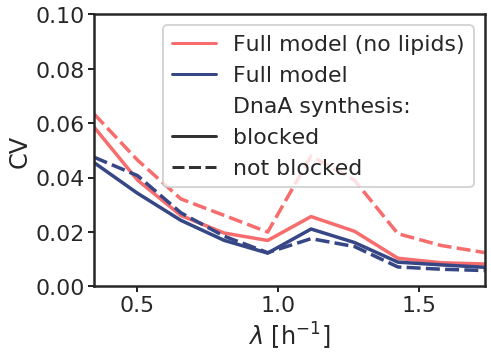

In [13]:
sns.set(style="ticks")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(
    x='rate_growth', 
    y='CV_v_init',
    data=data_frame.sort_values(by=["block_production"], ascending=False),
    hue='legend_lipids',
#     dashes=[(4, 1), (4, 1), (4, 1), (4, 1)],
    style ='DnaA synthesis:',
#     markers=True,
    palette= [pinkish_red, blue],#, pinkish_red, light_blue],#, yellow],
    linewidth = 3.5,
    ax=ax
);
# ax.lines[0].set_linestyle("--")
# ax.lines[1].set_linestyle("--")
# ax.lines[2].set_linestyle("--")
# ax.lines[3].set_linestyle("--")
# ax.lines[4].set_linestyle("--")
ax.margins(0)
ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'CV')
# plt.legend(labels=legend)
ax.set(ylim=(0,0.1))
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/variances_models.pdf', format='pdf', bbox_inches='tight')